<a href="https://colab.research.google.com/github/adityayadav4507/100Days_of_ML/blob/main/74_Day_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

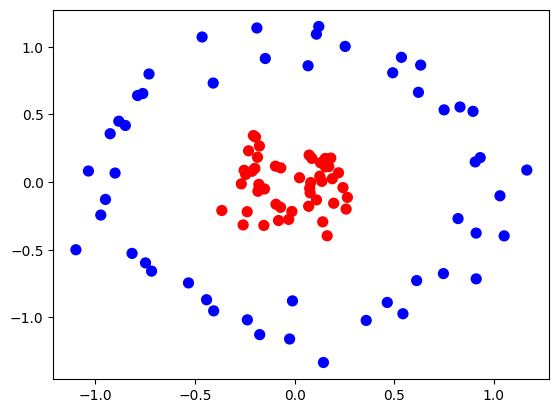

In [132]:
from sklearn.datasets import make_circles

X,y = make_circles(n_samples=100, noise=0.1, factor=0.2, random_state=0)

plt.scatter(X[:,0],X[:,1],c=y,s=50, cmap='bwr')

In [133]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

In [134]:
from sklearn.svm import SVC

svc=SVC(kernel="linear")
svc.fit(X_train,y_train)

from sklearn.metrics import  accuracy_score

y_pred=svc.predict(X_test)
accuracy_score(y_test,y_pred)

0.6333333333333333

In [135]:
from matplotlib.colors import ListedColormap

zero_one_colourmap = ListedColormap(('blue','red'))

def plot_decision_boundary(X,y,classifier):
  X_set, y_set = X,y
  x1,x2=np.meshgrid(np.arange(start=X_set[:,0].min()-1,
                                       stop=X_set[:,0].max()+1,
                                       step=0.01),
                             np.arange(start=X_set[:,1].min()-1,
                                       stop=X_set[:,1].max()+1,
                                       step=0.01))
  plt.contourf(x1,x2,classifier.predict(np.array([x1.ravel(),
                                                   x2.ravel()]).T).reshape(x1.shape),
              alpha=0.75, cmap=zero_one_colourmap)
  plt.xlim(x1.min(),x1.max())
  plt.ylim(x2.min(),x2.max())

  for i ,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],
                c=zero_one_colourmap(i),label=j)

  plt.title('SVM Decision Boundary')
  plt.xlabel('x1')
  plt.ylabel('x2')
  plt.legend()
  plt.show()


/tmp/ipython-input-135-1758817944.py:20: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],


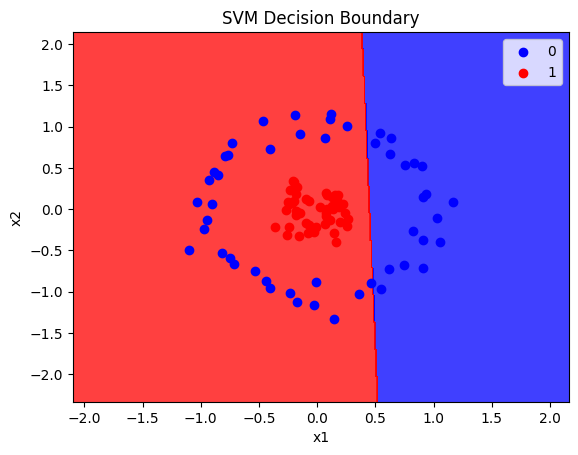

In [136]:
plot_decision_boundary(X,y,svc)

In [137]:


def plot_3d(X,y):

  r=np.exp(-(X**2).sum(1))
  ax=plt.subplot(projection='3d')
  ax.scatter3D(X[:,0],X[:,1],r,c=y,s=100,cmap='bwr')
  ax.set_xlabel('x1')
  ax.set_ylabel('x2')
  ax.set_zlabel('y')
  return ax



<Axes3D: xlabel='x1', ylabel='x2', zlabel='y'>

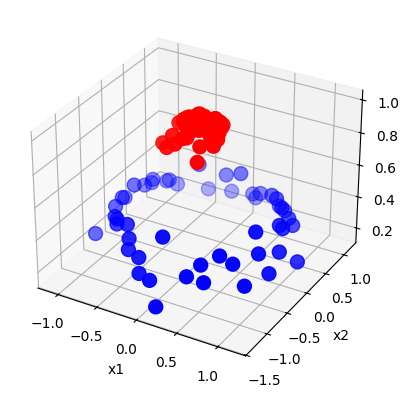

In [138]:
plot_3d(X,y)

In [139]:
# using rbf kernel

rbf_svc=SVC(kernel="rbf")
rbf_svc.fit(X_train,y_train)

y_pred=rbf_svc.predict(X_test)
accuracy_score(y_test,y_pred)

1.0

/tmp/ipython-input-135-1758817944.py:20: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],


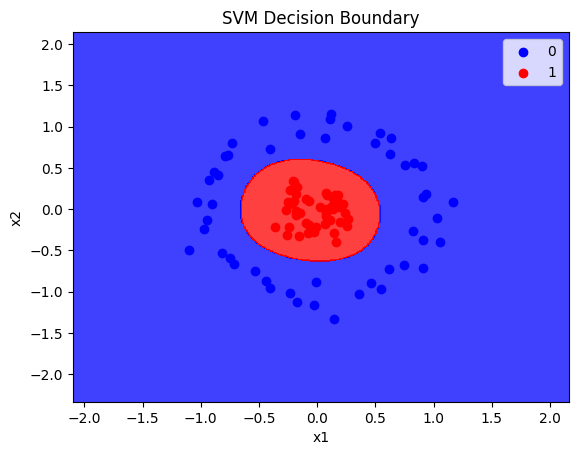

In [140]:
plot_decision_boundary(X,y,rbf_svc)

In [141]:
# for kernel ply

poly_svc=SVC(kernel="poly") # default degree is 3
poly_svc.fit(X_train,y_train)
accuracy_score(y_test,poly_svc.predict(X_test))

0.6666666666666666

/tmp/ipython-input-135-1758817944.py:20: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],


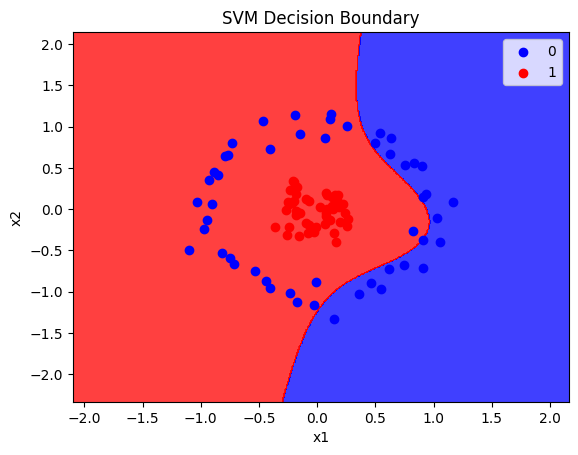

In [142]:
plot_decision_boundary(X,y,poly_svc)

In [143]:
# this is what happen in e^-x2 function

X,y = make_circles(n_samples=15,factor=0.1,noise=0.2)

X

array([[-0.73546214,  0.89173279],
       [ 0.44529012,  1.07360661],
       [ 0.08208243,  0.10257402],
       [-0.17255276, -0.10350281],
       [-0.86614286, -0.38529352],
       [-0.06199565,  0.32716988],
       [ 0.78764192,  0.1824078 ],
       [-0.20484938,  0.17573773],
       [-0.24121567, -0.83887163],
       [-0.28446117, -0.47620514],
       [ 0.0590291 , -0.24913222],
       [ 0.9748303 , -0.73743401],
       [-0.36181479,  0.75998693],
       [ 0.46016572,  0.00720725],
       [-0.10251292, -0.15407605]])

In [144]:
np.exp(-(X**2))

array([[0.58222136, 0.45149663],
       [0.82013748, 0.31580474],
       [0.99328512, 0.98953373],
       [0.97066444, 0.98934435],
       [0.47227046, 0.86204216],
       [0.99616392, 0.89848962],
       [0.53774016, 0.96727484],
       [0.958905  , 0.96958828],
       [0.94347539, 0.49474856],
       [0.92226917, 0.79710303],
       [0.99652163, 0.93982005],
       [0.3866273 , 0.58053283],
       [0.87729678, 0.56125488],
       [0.80916495, 0.99994806],
       [0.98954613, 0.97654014]])

In [145]:
np.exp(-(X**2)).sum(1) # alng axis =1 row wise sum

array([1.03371799, 1.13594223, 1.98281885, 1.96000878, 1.33431262,
       1.89465353, 1.50501501, 1.92849328, 1.43822395, 1.7193722 ,
       1.93634167, 0.96716013, 1.43855166, 1.80911301, 1.96608626])

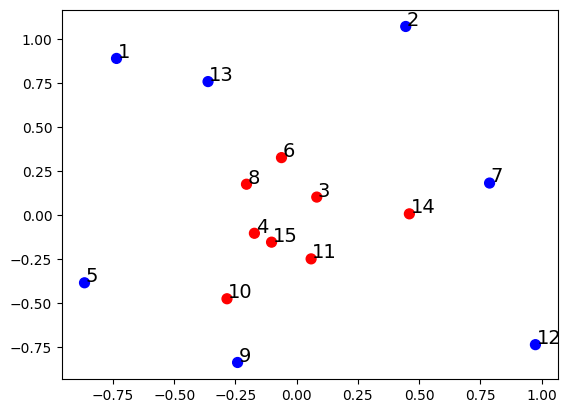

In [146]:
plt.scatter(X[:,0],X[:,1],c=y,s=50, cmap='bwr')
for idx, (xi, yi) in enumerate(zip(X[:,0], X[:,1]), start=1):
    plt.text(xi + 0.005, yi + 0.005,     # small offset so text doesn't overlap the marker
             str(idx),                   # the label: '1', '2', ...
             fontsize=14,
             color='black')

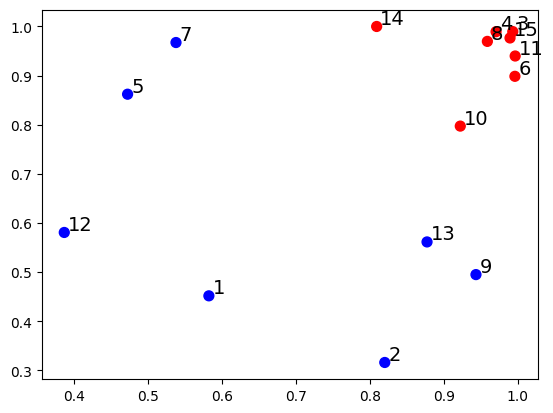

In [147]:
X_new=np.exp(-(X**2))
plt.scatter(X_new[:,0],X_new[:,1],c=y,s=50, cmap='bwr') # this is in 2 d
for idx, (xi, yi) in enumerate(zip(X_new[:,0], X_new[:,1]), start=1):
    plt.text(xi + 0.005, yi + 0.005,     # small offset so text doesn't overlap the marker
             str(idx),                   # the label: '1', '2', ...
             fontsize=14,
             color='black')



```
the point which are around(0,0) go -> (1,1)
and the points which around (1,1)`-> (0,0)
``
bec e^(-X**2)
e^0=1
e^(-1)=0.36
